In [77]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

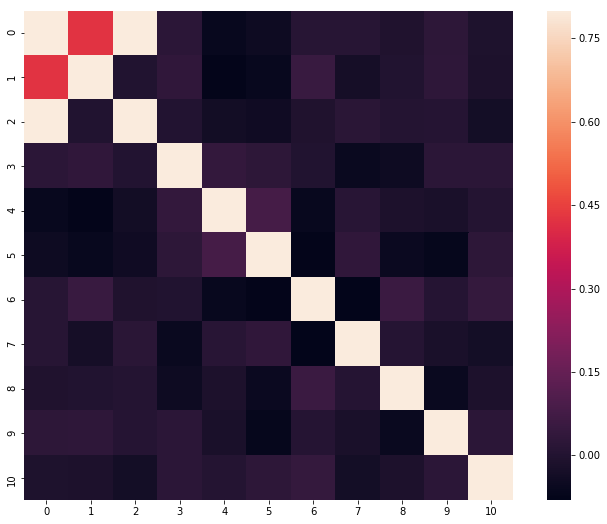

In [78]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8345074788751741
R-squared PLSR: 0.8345074759767697


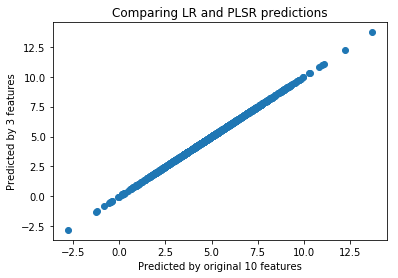

In [79]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=4)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Increasing the number of components from 3 to 6 does not have a significant impact on R-squared.  This suggests that our orginal 3 components do a good job of explaining the variance in Y.


## Changing Y:

Below I used the gamma distribution to generate Y

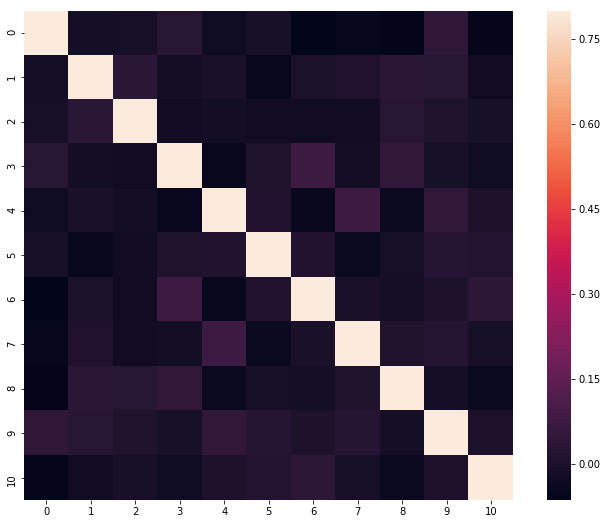

In [80]:
# Number of datapoints in outcome.
n2 = 1000

# Number of features.
p2 = 10

# Create random normally distributed data for parameters.
X2 = np.random.normal(size=n * p2).reshape((n2, p2))

# Create normally distributed outcome related to parameters but with noise.
y2 = y = X[:, 0] + 2 * X[:, 1] + np.random.gamma(p2, size=n2) + 5



# Check out correlations. First column is the outcome.
f2, ax2 = plt.subplots(figsize=(12, 9))
corrmat2 = pd.DataFrame(np.insert(X2, 0, y2, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat2, vmax=.8, square=True)
plt.show()

R-squared regression: 0.01804132775019407
R-squared PLSR: -7.401256155494714


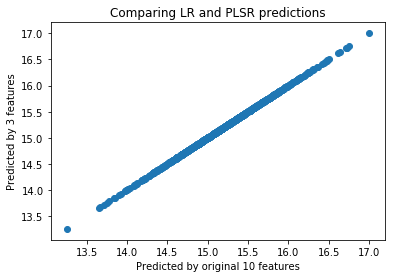

In [81]:
# Fit a linear model with all 10 features.
regr2 = linear_model.LinearRegression()
regr2.fit(X2, y2)

# Save predicted values.
Y_pred2 = regr2.predict(X2)
print('R-squared regression:', regr2.score(X2, y2))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls2 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls2.fit(X2, y2)

# Save predicted values.
Y_PLS_pred2 = pls2.predict(X2)
print('R-squared PLSR:', pls1.score(X2, y2))

# Compare the predictions of the two models
plt.scatter(Y_pred2,Y_PLS_pred2) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Changing the way Y is calculated, from a normal distribution to a gamma distribution, greatly reduces the R-squared.